In [1]:
%run ./Model.ipynb

✅ 当前设备：cuda
✅ 数据集加载完成，共 10 类


In [2]:
models = {
    "BirdCNN": BirdCNN(num_classes=num_classes).to(device),
    "BirdCNN_Optimal": BirdCNN_Optimal(num_classes=num_classes).to(device),
    "BirdResNet": BirdResNet(num_classes=num_classes).to(device)
}

num_epochs = 80
early_stopping_patience = 5

results = {}

for name, model in models.items():
    print(f"\n================= 🚀 开始训练模型: {name} =================")
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    try:
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5, verbose=False)
    except TypeError:
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)

    train_losses, train_accs, test_accs = [], [], []
    best_acc = 0
    best_epoch = 0
    patience_counter = 0
    start_time = time.time()

    for epoch in range(1, num_epochs + 1):
        epoch_start = time.time()
        train_loss, train_acc = train_one_epoch(model, device, train_loader, optimizer)
        test_loss, test_acc = evaluate(model, device, test_loader)
        scheduler.step(test_acc)

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # 检查是否有提升
        improved = test_acc > best_acc
        if improved:
            best_acc = test_acc
            best_epoch = epoch
            patience_counter = 0
            torch.save(model.state_dict(), f"{name}_best.pth")
        else:
            patience_counter += 1

        # 日志输出
        print(
            f"[{name}] Epoch {epoch:02d}/{num_epochs} | "
            f"TrainLoss={train_loss:.4f} | TestLoss={test_loss:.4f} | "
            f"TrainAcc={train_acc:.2f}% | TestAcc={test_acc:.2f}% | "
            f"BestAcc={best_acc:.2f}% (E{best_epoch})"
        )
        print(
            f" └─ LR={optimizer.param_groups[0]['lr']:.6f} | "
            f"Patience={patience_counter}/{early_stopping_patience} | "
            f"Time={time.time()-start_time:.2f}s | "
            f"{'✅ Improved & Saved' if improved else '⏸ No Improvement'}"
        )
        # 检查早停
        if patience_counter >= early_stopping_patience:
            print(f"\n⚠️ 早停触发：连续 {early_stopping_patience} 轮准确率未提升，停止训练。")
            break

    total_time = (time.time() - start_time) / 60
    print(f"🏁 模型 {name} 训练结束！最佳准确率: {best_acc:.2f}% (Epoch {best_epoch}) | 总耗时: {total_time:.2f} 分钟")

    results[name] = {
        "train_losses": train_losses,
        "train_accs": train_accs,
        "test_accs": test_accs,
        "best_acc": best_acc,
        "best_epoch": best_epoch
    }

print("\n✅ 所有模型训练完成！")


================= 🚀 开始训练模型: BirdCNN =================


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.70it/s]


[BirdCNN] Epoch 01/80 | TrainLoss=1.9680 | TestLoss=1.7660 | TrainAcc=29.60% | TestAcc=35.63% | BestAcc=35.63% (E1)
 └─ LR=0.001000 | Patience=0/5 | Time=11.63s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.52it/s]


[BirdCNN] Epoch 02/80 | TrainLoss=1.6531 | TestLoss=1.5109 | TrainAcc=40.80% | TestAcc=47.07% | BestAcc=47.07% (E2)
 └─ LR=0.001000 | Patience=0/5 | Time=23.60s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 03/80 | TrainLoss=1.4917 | TestLoss=1.3734 | TrainAcc=47.89% | TestAcc=52.19% | BestAcc=52.19% (E3)
 └─ LR=0.001000 | Patience=0/5 | Time=35.40s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.78it/s]


[BirdCNN] Epoch 04/80 | TrainLoss=1.3897 | TestLoss=1.3184 | TrainAcc=52.03% | TestAcc=54.37% | BestAcc=54.37% (E4)
 └─ LR=0.001000 | Patience=0/5 | Time=47.01s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.67it/s]


[BirdCNN] Epoch 05/80 | TrainLoss=1.3010 | TestLoss=1.1852 | TrainAcc=55.51% | TestAcc=58.71% | BestAcc=58.71% (E5)
 └─ LR=0.001000 | Patience=0/5 | Time=58.74s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.68it/s]


[BirdCNN] Epoch 06/80 | TrainLoss=1.2023 | TestLoss=1.0402 | TrainAcc=58.87% | TestAcc=65.40% | BestAcc=65.40% (E6)
 └─ LR=0.001000 | Patience=0/5 | Time=70.35s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.68it/s]


[BirdCNN] Epoch 07/80 | TrainLoss=1.1264 | TestLoss=1.0226 | TrainAcc=60.66% | TestAcc=65.93% | BestAcc=65.93% (E7)
 └─ LR=0.001000 | Patience=0/5 | Time=82.02s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.51it/s]


[BirdCNN] Epoch 08/80 | TrainLoss=1.0558 | TestLoss=0.9222 | TrainAcc=63.93% | TestAcc=67.69% | BestAcc=67.69% (E8)
 └─ LR=0.001000 | Patience=0/5 | Time=94.01s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 09/80 | TrainLoss=0.9887 | TestLoss=0.9916 | TrainAcc=65.88% | TestAcc=67.86% | BestAcc=67.86% (E9)
 └─ LR=0.001000 | Patience=0/5 | Time=105.81s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.61it/s]


[BirdCNN] Epoch 10/80 | TrainLoss=0.9002 | TestLoss=0.7699 | TrainAcc=69.24% | TestAcc=75.36% | BestAcc=75.36% (E10)
 └─ LR=0.001000 | Patience=0/5 | Time=117.69s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.65it/s]


[BirdCNN] Epoch 11/80 | TrainLoss=0.8513 | TestLoss=0.7577 | TrainAcc=70.65% | TestAcc=75.24% | BestAcc=75.36% (E10)
 └─ LR=0.001000 | Patience=1/5 | Time=129.51s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.47it/s]


[BirdCNN] Epoch 12/80 | TrainLoss=0.8203 | TestLoss=0.7639 | TrainAcc=72.06% | TestAcc=74.01% | BestAcc=75.36% (E10)
 └─ LR=0.001000 | Patience=2/5 | Time=141.51s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.59it/s]


[BirdCNN] Epoch 13/80 | TrainLoss=0.7695 | TestLoss=0.6624 | TrainAcc=73.55% | TestAcc=79.13% | BestAcc=79.13% (E13)
 └─ LR=0.001000 | Patience=0/5 | Time=153.33s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.68it/s]


[BirdCNN] Epoch 14/80 | TrainLoss=0.7272 | TestLoss=0.6177 | TrainAcc=75.58% | TestAcc=80.85% | BestAcc=80.85% (E14)
 └─ LR=0.001000 | Patience=0/5 | Time=164.96s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.74it/s]


[BirdCNN] Epoch 15/80 | TrainLoss=0.7178 | TestLoss=0.5951 | TrainAcc=76.08% | TestAcc=81.63% | BestAcc=81.63% (E15)
 └─ LR=0.001000 | Patience=0/5 | Time=176.54s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.75it/s]


[BirdCNN] Epoch 16/80 | TrainLoss=0.6422 | TestLoss=0.5508 | TrainAcc=77.78% | TestAcc=82.04% | BestAcc=82.04% (E16)
 └─ LR=0.001000 | Patience=0/5 | Time=188.11s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.76it/s]


[BirdCNN] Epoch 17/80 | TrainLoss=0.5863 | TestLoss=0.5446 | TrainAcc=79.89% | TestAcc=81.75% | BestAcc=82.04% (E16)
 └─ LR=0.001000 | Patience=1/5 | Time=199.61s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.77it/s]


[BirdCNN] Epoch 18/80 | TrainLoss=0.5829 | TestLoss=0.4843 | TrainAcc=79.27% | TestAcc=85.03% | BestAcc=85.03% (E18)
 └─ LR=0.001000 | Patience=0/5 | Time=211.43s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:07<00:00,  5.15it/s]


[BirdCNN] Epoch 19/80 | TrainLoss=0.5509 | TestLoss=0.4865 | TrainAcc=81.22% | TestAcc=85.32% | BestAcc=85.32% (E19)
 └─ LR=0.001000 | Patience=0/5 | Time=224.25s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.57it/s]


[BirdCNN] Epoch 20/80 | TrainLoss=0.5856 | TestLoss=0.4905 | TrainAcc=80.31% | TestAcc=84.83% | BestAcc=85.32% (E19)
 └─ LR=0.001000 | Patience=1/5 | Time=236.10s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.69it/s]


[BirdCNN] Epoch 21/80 | TrainLoss=0.5065 | TestLoss=0.4939 | TrainAcc=82.67% | TestAcc=84.99% | BestAcc=85.32% (E19)
 └─ LR=0.001000 | Patience=2/5 | Time=248.00s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.63it/s]


[BirdCNN] Epoch 22/80 | TrainLoss=0.4607 | TestLoss=0.4599 | TrainAcc=84.74% | TestAcc=86.51% | BestAcc=86.51% (E22)
 └─ LR=0.001000 | Patience=0/5 | Time=259.78s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.50it/s]


[BirdCNN] Epoch 23/80 | TrainLoss=0.4784 | TestLoss=0.3907 | TrainAcc=83.67% | TestAcc=88.40% | BestAcc=88.40% (E23)
 └─ LR=0.001000 | Patience=0/5 | Time=271.83s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.50it/s]


[BirdCNN] Epoch 24/80 | TrainLoss=0.4497 | TestLoss=0.3813 | TrainAcc=84.20% | TestAcc=88.77% | BestAcc=88.77% (E24)
 └─ LR=0.001000 | Patience=0/5 | Time=283.91s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.58it/s]


[BirdCNN] Epoch 25/80 | TrainLoss=0.4344 | TestLoss=0.3832 | TrainAcc=84.91% | TestAcc=88.72% | BestAcc=88.77% (E24)
 └─ LR=0.001000 | Patience=1/5 | Time=295.86s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.62it/s]


[BirdCNN] Epoch 26/80 | TrainLoss=0.4181 | TestLoss=0.3475 | TrainAcc=85.82% | TestAcc=89.38% | BestAcc=89.38% (E26)
 └─ LR=0.001000 | Patience=0/5 | Time=307.71s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.59it/s]


[BirdCNN] Epoch 27/80 | TrainLoss=0.3863 | TestLoss=0.4010 | TrainAcc=86.32% | TestAcc=88.11% | BestAcc=89.38% (E26)
 └─ LR=0.001000 | Patience=1/5 | Time=319.60s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.59it/s]


[BirdCNN] Epoch 28/80 | TrainLoss=0.3821 | TestLoss=0.3413 | TrainAcc=87.31% | TestAcc=90.41% | BestAcc=90.41% (E28)
 └─ LR=0.001000 | Patience=0/5 | Time=331.58s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.59it/s]


[BirdCNN] Epoch 29/80 | TrainLoss=0.3225 | TestLoss=0.3128 | TrainAcc=88.56% | TestAcc=91.96% | BestAcc=91.96% (E29)
 └─ LR=0.001000 | Patience=0/5 | Time=343.51s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.54it/s]


[BirdCNN] Epoch 30/80 | TrainLoss=0.3423 | TestLoss=0.2977 | TrainAcc=88.47% | TestAcc=92.33% | BestAcc=92.33% (E30)
 └─ LR=0.001000 | Patience=0/5 | Time=355.49s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.62it/s]


[BirdCNN] Epoch 31/80 | TrainLoss=0.3447 | TestLoss=0.3150 | TrainAcc=88.93% | TestAcc=91.27% | BestAcc=92.33% (E30)
 └─ LR=0.001000 | Patience=1/5 | Time=367.41s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.59it/s]


[BirdCNN] Epoch 32/80 | TrainLoss=0.3164 | TestLoss=0.2975 | TrainAcc=90.22% | TestAcc=92.13% | BestAcc=92.33% (E30)
 └─ LR=0.001000 | Patience=2/5 | Time=379.30s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.55it/s]


[BirdCNN] Epoch 33/80 | TrainLoss=0.3188 | TestLoss=0.3364 | TrainAcc=89.14% | TestAcc=90.45% | BestAcc=92.33% (E30)
 └─ LR=0.001000 | Patience=3/5 | Time=391.28s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.56it/s]


[BirdCNN] Epoch 34/80 | TrainLoss=0.2799 | TestLoss=0.2605 | TrainAcc=89.64% | TestAcc=93.32% | BestAcc=93.32% (E34)
 └─ LR=0.001000 | Patience=0/5 | Time=403.22s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 35/80 | TrainLoss=0.2845 | TestLoss=0.2912 | TrainAcc=90.84% | TestAcc=92.33% | BestAcc=93.32% (E34)
 └─ LR=0.001000 | Patience=1/5 | Time=415.02s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 36/80 | TrainLoss=0.2956 | TestLoss=0.2913 | TrainAcc=89.84% | TestAcc=92.62% | BestAcc=93.32% (E34)
 └─ LR=0.001000 | Patience=2/5 | Time=426.82s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.67it/s]


[BirdCNN] Epoch 37/80 | TrainLoss=0.3120 | TestLoss=0.2533 | TrainAcc=88.39% | TestAcc=93.23% | BestAcc=93.32% (E34)
 └─ LR=0.001000 | Patience=3/5 | Time=438.56s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 38/80 | TrainLoss=0.2891 | TestLoss=0.2648 | TrainAcc=90.22% | TestAcc=93.64% | BestAcc=93.64% (E38)
 └─ LR=0.001000 | Patience=0/5 | Time=450.36s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 39/80 | TrainLoss=0.2770 | TestLoss=0.2530 | TrainAcc=90.22% | TestAcc=93.85% | BestAcc=93.85% (E39)
 └─ LR=0.001000 | Patience=0/5 | Time=462.17s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.60it/s]


[BirdCNN] Epoch 40/80 | TrainLoss=0.2863 | TestLoss=0.2495 | TrainAcc=90.46% | TestAcc=93.48% | BestAcc=93.85% (E39)
 └─ LR=0.001000 | Patience=1/5 | Time=473.88s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.78it/s]


[BirdCNN] Epoch 41/80 | TrainLoss=0.2344 | TestLoss=0.2316 | TrainAcc=91.92% | TestAcc=94.05% | BestAcc=94.05% (E41)
 └─ LR=0.001000 | Patience=0/5 | Time=485.38s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.78it/s]


[BirdCNN] Epoch 42/80 | TrainLoss=0.2391 | TestLoss=0.2690 | TrainAcc=91.58% | TestAcc=93.15% | BestAcc=94.05% (E41)
 └─ LR=0.001000 | Patience=1/5 | Time=497.00s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.61it/s]


[BirdCNN] Epoch 43/80 | TrainLoss=0.2434 | TestLoss=0.2333 | TrainAcc=92.25% | TestAcc=94.10% | BestAcc=94.10% (E43)
 └─ LR=0.001000 | Patience=0/5 | Time=508.82s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.58it/s]


[BirdCNN] Epoch 44/80 | TrainLoss=0.2298 | TestLoss=0.2275 | TrainAcc=92.29% | TestAcc=94.38% | BestAcc=94.38% (E44)
 └─ LR=0.001000 | Patience=0/5 | Time=520.64s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.66it/s]


[BirdCNN] Epoch 45/80 | TrainLoss=0.2211 | TestLoss=0.2390 | TrainAcc=92.12% | TestAcc=95.04% | BestAcc=95.04% (E45)
 └─ LR=0.001000 | Patience=0/5 | Time=532.39s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.65it/s]


[BirdCNN] Epoch 46/80 | TrainLoss=0.2642 | TestLoss=0.2550 | TrainAcc=90.96% | TestAcc=93.73% | BestAcc=95.04% (E45)
 └─ LR=0.001000 | Patience=1/5 | Time=544.16s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.67it/s]


[BirdCNN] Epoch 47/80 | TrainLoss=0.2295 | TestLoss=0.2558 | TrainAcc=92.83% | TestAcc=93.60% | BestAcc=95.04% (E45)
 └─ LR=0.001000 | Patience=2/5 | Time=555.88s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 48/80 | TrainLoss=0.2152 | TestLoss=0.2282 | TrainAcc=92.70% | TestAcc=94.92% | BestAcc=95.04% (E45)
 └─ LR=0.001000 | Patience=3/5 | Time=567.64s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.65it/s]


[BirdCNN] Epoch 49/80 | TrainLoss=0.2292 | TestLoss=0.2270 | TrainAcc=92.08% | TestAcc=94.63% | BestAcc=95.04% (E45)
 └─ LR=0.000500 | Patience=4/5 | Time=579.43s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.67it/s]


[BirdCNN] Epoch 50/80 | TrainLoss=0.1936 | TestLoss=0.1977 | TrainAcc=93.99% | TestAcc=95.49% | BestAcc=95.49% (E50)
 └─ LR=0.000500 | Patience=0/5 | Time=591.22s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.65it/s]


[BirdCNN] Epoch 51/80 | TrainLoss=0.1686 | TestLoss=0.1961 | TrainAcc=94.32% | TestAcc=95.69% | BestAcc=95.69% (E51)
 └─ LR=0.000500 | Patience=0/5 | Time=603.14s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.61it/s]


[BirdCNN] Epoch 52/80 | TrainLoss=0.1592 | TestLoss=0.1857 | TrainAcc=95.23% | TestAcc=95.98% | BestAcc=95.98% (E52)
 └─ LR=0.000500 | Patience=0/5 | Time=614.97s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.61it/s]


[BirdCNN] Epoch 53/80 | TrainLoss=0.1441 | TestLoss=0.1898 | TrainAcc=95.19% | TestAcc=96.06% | BestAcc=96.06% (E53)
 └─ LR=0.000500 | Patience=0/5 | Time=626.83s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.62it/s]


[BirdCNN] Epoch 54/80 | TrainLoss=0.1469 | TestLoss=0.1914 | TrainAcc=95.44% | TestAcc=96.23% | BestAcc=96.23% (E54)
 └─ LR=0.000500 | Patience=0/5 | Time=638.69s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.61it/s]


[BirdCNN] Epoch 55/80 | TrainLoss=0.1295 | TestLoss=0.1781 | TrainAcc=95.90% | TestAcc=96.31% | BestAcc=96.31% (E55)
 └─ LR=0.000500 | Patience=0/5 | Time=650.58s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.61it/s]


[BirdCNN] Epoch 56/80 | TrainLoss=0.1312 | TestLoss=0.1836 | TrainAcc=95.27% | TestAcc=96.31% | BestAcc=96.31% (E55)
 └─ LR=0.000500 | Patience=1/5 | Time=662.43s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.60it/s]


[BirdCNN] Epoch 57/80 | TrainLoss=0.1091 | TestLoss=0.1698 | TrainAcc=96.60% | TestAcc=96.68% | BestAcc=96.68% (E57)
 └─ LR=0.000500 | Patience=0/5 | Time=674.28s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.58it/s]


[BirdCNN] Epoch 58/80 | TrainLoss=0.1309 | TestLoss=0.1829 | TrainAcc=95.52% | TestAcc=96.51% | BestAcc=96.68% (E57)
 └─ LR=0.000500 | Patience=1/5 | Time=686.23s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.62it/s]


[BirdCNN] Epoch 59/80 | TrainLoss=0.1191 | TestLoss=0.1724 | TrainAcc=95.81% | TestAcc=96.88% | BestAcc=96.88% (E59)
 └─ LR=0.000500 | Patience=0/5 | Time=698.08s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.64it/s]


[BirdCNN] Epoch 60/80 | TrainLoss=0.1276 | TestLoss=0.1799 | TrainAcc=95.61% | TestAcc=96.68% | BestAcc=96.88% (E59)
 └─ LR=0.000500 | Patience=1/5 | Time=709.84s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.62it/s]


[BirdCNN] Epoch 61/80 | TrainLoss=0.1146 | TestLoss=0.1873 | TrainAcc=96.06% | TestAcc=96.43% | BestAcc=96.88% (E59)
 └─ LR=0.000500 | Patience=2/5 | Time=721.73s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.55it/s]


[BirdCNN] Epoch 62/80 | TrainLoss=0.1139 | TestLoss=0.1776 | TrainAcc=96.02% | TestAcc=96.47% | BestAcc=96.88% (E59)
 └─ LR=0.000500 | Patience=3/5 | Time=733.72s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.62it/s]


[BirdCNN] Epoch 63/80 | TrainLoss=0.1170 | TestLoss=0.1945 | TrainAcc=96.27% | TestAcc=96.27% | BestAcc=96.88% (E59)
 └─ LR=0.000250 | Patience=4/5 | Time=745.55s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.60it/s]


[BirdCNN] Epoch 64/80 | TrainLoss=0.1040 | TestLoss=0.1717 | TrainAcc=96.52% | TestAcc=96.92% | BestAcc=96.92% (E64)
 └─ LR=0.000250 | Patience=0/5 | Time=757.43s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.60it/s]


[BirdCNN] Epoch 65/80 | TrainLoss=0.1000 | TestLoss=0.1662 | TrainAcc=96.43% | TestAcc=96.68% | BestAcc=96.92% (E64)
 └─ LR=0.000250 | Patience=1/5 | Time=769.34s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.61it/s]


[BirdCNN] Epoch 66/80 | TrainLoss=0.0926 | TestLoss=0.1632 | TrainAcc=96.93% | TestAcc=96.56% | BestAcc=96.92% (E64)
 └─ LR=0.000250 | Patience=2/5 | Time=781.20s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.63it/s]


[BirdCNN] Epoch 67/80 | TrainLoss=0.0926 | TestLoss=0.1616 | TrainAcc=96.72% | TestAcc=96.88% | BestAcc=96.92% (E64)
 └─ LR=0.000250 | Patience=3/5 | Time=793.04s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.59it/s]


[BirdCNN] Epoch 68/80 | TrainLoss=0.0840 | TestLoss=0.1628 | TrainAcc=97.18% | TestAcc=96.84% | BestAcc=96.92% (E64)
 └─ LR=0.000125 | Patience=4/5 | Time=804.92s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:06<00:00,  5.58it/s]


[BirdCNN] Epoch 69/80 | TrainLoss=0.0794 | TestLoss=0.1558 | TrainAcc=97.14% | TestAcc=96.76% | BestAcc=96.92% (E64)
 └─ LR=0.000125 | Patience=5/5 | Time=816.80s | ⏸ No Improvement

⚠️ 早停触发：连续 5 轮准确率未提升，停止训练。
🏁 模型 BirdCNN 训练结束！最佳准确率: 96.92% (Epoch 64) | 总耗时: 13.61 分钟

================= 🚀 开始训练模型: BirdCNN_Optimal =================


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.28it/s]


[BirdCNN_Optimal] Epoch 01/80 | TrainLoss=1.9692 | TestLoss=1.8386 | TrainAcc=28.73% | TestAcc=33.42% | BestAcc=33.42% (E1)
 └─ LR=0.001000 | Patience=0/5 | Time=14.80s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.27it/s]


[BirdCNN_Optimal] Epoch 02/80 | TrainLoss=1.6676 | TestLoss=1.4969 | TrainAcc=40.51% | TestAcc=48.75% | BestAcc=48.75% (E2)
 └─ LR=0.001000 | Patience=0/5 | Time=29.76s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.26it/s]


[BirdCNN_Optimal] Epoch 03/80 | TrainLoss=1.5078 | TestLoss=1.3369 | TrainAcc=45.52% | TestAcc=53.38% | BestAcc=53.38% (E3)
 └─ LR=0.001000 | Patience=0/5 | Time=44.64s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.28it/s]


[BirdCNN_Optimal] Epoch 04/80 | TrainLoss=1.3745 | TestLoss=1.2368 | TrainAcc=52.28% | TestAcc=58.47% | BestAcc=58.47% (E4)
 └─ LR=0.001000 | Patience=0/5 | Time=59.47s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.28it/s]


[BirdCNN_Optimal] Epoch 05/80 | TrainLoss=1.2747 | TestLoss=1.2208 | TrainAcc=55.85% | TestAcc=58.96% | BestAcc=58.96% (E5)
 └─ LR=0.001000 | Patience=0/5 | Time=74.28s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 06/80 | TrainLoss=1.1763 | TestLoss=1.0024 | TrainAcc=59.25% | TestAcc=67.08% | BestAcc=67.08% (E6)
 └─ LR=0.001000 | Patience=0/5 | Time=89.07s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.30it/s]


[BirdCNN_Optimal] Epoch 07/80 | TrainLoss=1.1036 | TestLoss=0.9305 | TrainAcc=62.11% | TestAcc=68.10% | BestAcc=68.10% (E7)
 └─ LR=0.001000 | Patience=0/5 | Time=103.81s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.31it/s]


[BirdCNN_Optimal] Epoch 08/80 | TrainLoss=0.9922 | TestLoss=0.7935 | TrainAcc=64.84% | TestAcc=74.78% | BestAcc=74.78% (E8)
 └─ LR=0.001000 | Patience=0/5 | Time=118.57s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.27it/s]


[BirdCNN_Optimal] Epoch 09/80 | TrainLoss=0.9595 | TestLoss=0.7579 | TrainAcc=67.41% | TestAcc=76.14% | BestAcc=76.14% (E9)
 └─ LR=0.001000 | Patience=0/5 | Time=133.37s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.30it/s]


[BirdCNN_Optimal] Epoch 10/80 | TrainLoss=0.9195 | TestLoss=0.8091 | TrainAcc=69.07% | TestAcc=73.51% | BestAcc=76.14% (E9)
 └─ LR=0.001000 | Patience=1/5 | Time=148.06s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.28it/s]


[BirdCNN_Optimal] Epoch 11/80 | TrainLoss=0.8717 | TestLoss=0.6846 | TrainAcc=69.98% | TestAcc=78.15% | BestAcc=78.15% (E11)
 └─ LR=0.001000 | Patience=0/5 | Time=162.84s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.31it/s]


[BirdCNN_Optimal] Epoch 12/80 | TrainLoss=0.8169 | TestLoss=0.6000 | TrainAcc=72.31% | TestAcc=80.77% | BestAcc=80.77% (E12)
 └─ LR=0.001000 | Patience=0/5 | Time=177.60s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.31it/s]


[BirdCNN_Optimal] Epoch 13/80 | TrainLoss=0.7050 | TestLoss=0.6176 | TrainAcc=76.37% | TestAcc=79.95% | BestAcc=80.77% (E12)
 └─ LR=0.001000 | Patience=1/5 | Time=192.32s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 14/80 | TrainLoss=0.7034 | TestLoss=0.4874 | TrainAcc=75.75% | TestAcc=85.69% | BestAcc=85.69% (E14)
 └─ LR=0.001000 | Patience=0/5 | Time=207.14s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.27it/s]


[BirdCNN_Optimal] Epoch 15/80 | TrainLoss=0.6691 | TestLoss=0.4821 | TrainAcc=76.62% | TestAcc=86.02% | BestAcc=86.02% (E15)
 └─ LR=0.001000 | Patience=0/5 | Time=221.92s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.20it/s]


[BirdCNN_Optimal] Epoch 16/80 | TrainLoss=0.6341 | TestLoss=0.4346 | TrainAcc=79.06% | TestAcc=87.13% | BestAcc=87.13% (E16)
 └─ LR=0.001000 | Patience=0/5 | Time=237.34s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 17/80 | TrainLoss=0.5817 | TestLoss=0.4157 | TrainAcc=79.77% | TestAcc=87.58% | BestAcc=87.58% (E17)
 └─ LR=0.001000 | Patience=0/5 | Time=252.14s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.27it/s]


[BirdCNN_Optimal] Epoch 18/80 | TrainLoss=0.5522 | TestLoss=0.3876 | TrainAcc=80.89% | TestAcc=88.81% | BestAcc=88.81% (E18)
 └─ LR=0.001000 | Patience=0/5 | Time=266.90s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.31it/s]


[BirdCNN_Optimal] Epoch 19/80 | TrainLoss=0.5142 | TestLoss=0.3585 | TrainAcc=82.55% | TestAcc=90.16% | BestAcc=90.16% (E19)
 └─ LR=0.001000 | Patience=0/5 | Time=281.72s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 20/80 | TrainLoss=0.5426 | TestLoss=0.3422 | TrainAcc=80.93% | TestAcc=90.16% | BestAcc=90.16% (E19)
 └─ LR=0.001000 | Patience=1/5 | Time=296.51s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.26it/s]


[BirdCNN_Optimal] Epoch 21/80 | TrainLoss=0.4893 | TestLoss=0.3708 | TrainAcc=83.96% | TestAcc=88.97% | BestAcc=90.16% (E19)
 └─ LR=0.001000 | Patience=2/5 | Time=311.37s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.33it/s]


[BirdCNN_Optimal] Epoch 22/80 | TrainLoss=0.4585 | TestLoss=0.2790 | TrainAcc=84.66% | TestAcc=93.15% | BestAcc=93.15% (E22)
 └─ LR=0.001000 | Patience=0/5 | Time=326.01s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.30it/s]


[BirdCNN_Optimal] Epoch 23/80 | TrainLoss=0.4459 | TestLoss=0.2932 | TrainAcc=85.20% | TestAcc=92.13% | BestAcc=93.15% (E22)
 └─ LR=0.001000 | Patience=1/5 | Time=341.67s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.18it/s]


[BirdCNN_Optimal] Epoch 24/80 | TrainLoss=0.3995 | TestLoss=0.2788 | TrainAcc=86.28% | TestAcc=93.07% | BestAcc=93.15% (E22)
 └─ LR=0.001000 | Patience=2/5 | Time=356.79s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.21it/s]


[BirdCNN_Optimal] Epoch 25/80 | TrainLoss=0.4304 | TestLoss=0.2603 | TrainAcc=84.91% | TestAcc=93.23% | BestAcc=93.23% (E25)
 └─ LR=0.001000 | Patience=0/5 | Time=371.93s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.21it/s]


[BirdCNN_Optimal] Epoch 26/80 | TrainLoss=0.3918 | TestLoss=0.2535 | TrainAcc=86.15% | TestAcc=93.69% | BestAcc=93.69% (E26)
 └─ LR=0.001000 | Patience=0/5 | Time=387.03s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.24it/s]


[BirdCNN_Optimal] Epoch 27/80 | TrainLoss=0.3802 | TestLoss=0.2755 | TrainAcc=87.40% | TestAcc=92.41% | BestAcc=93.69% (E26)
 └─ LR=0.001000 | Patience=1/5 | Time=401.97s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.19it/s]


[BirdCNN_Optimal] Epoch 28/80 | TrainLoss=0.3680 | TestLoss=0.2599 | TrainAcc=87.23% | TestAcc=93.07% | BestAcc=93.69% (E26)
 └─ LR=0.001000 | Patience=2/5 | Time=417.06s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.16it/s]


[BirdCNN_Optimal] Epoch 29/80 | TrainLoss=0.3473 | TestLoss=0.2251 | TrainAcc=88.68% | TestAcc=94.26% | BestAcc=94.26% (E29)
 └─ LR=0.001000 | Patience=0/5 | Time=432.22s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.22it/s]


[BirdCNN_Optimal] Epoch 30/80 | TrainLoss=0.3027 | TestLoss=0.2203 | TrainAcc=90.01% | TestAcc=94.75% | BestAcc=94.75% (E30)
 └─ LR=0.001000 | Patience=0/5 | Time=447.26s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.20it/s]


[BirdCNN_Optimal] Epoch 31/80 | TrainLoss=0.3298 | TestLoss=0.2346 | TrainAcc=88.64% | TestAcc=94.22% | BestAcc=94.75% (E30)
 └─ LR=0.001000 | Patience=1/5 | Time=462.29s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.23it/s]


[BirdCNN_Optimal] Epoch 32/80 | TrainLoss=0.3074 | TestLoss=0.2200 | TrainAcc=89.43% | TestAcc=94.30% | BestAcc=94.75% (E30)
 └─ LR=0.001000 | Patience=2/5 | Time=477.27s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.22it/s]


[BirdCNN_Optimal] Epoch 33/80 | TrainLoss=0.2957 | TestLoss=0.2458 | TrainAcc=89.97% | TestAcc=93.81% | BestAcc=94.75% (E30)
 └─ LR=0.001000 | Patience=3/5 | Time=492.29s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.20it/s]


[BirdCNN_Optimal] Epoch 34/80 | TrainLoss=0.3184 | TestLoss=0.1990 | TrainAcc=88.85% | TestAcc=95.28% | BestAcc=95.28% (E34)
 └─ LR=0.001000 | Patience=0/5 | Time=507.42s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.20it/s]


[BirdCNN_Optimal] Epoch 35/80 | TrainLoss=0.3170 | TestLoss=0.2087 | TrainAcc=88.93% | TestAcc=95.61% | BestAcc=95.61% (E35)
 └─ LR=0.001000 | Patience=0/5 | Time=522.55s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.22it/s]


[BirdCNN_Optimal] Epoch 36/80 | TrainLoss=0.2719 | TestLoss=0.1798 | TrainAcc=90.30% | TestAcc=96.23% | BestAcc=96.23% (E36)
 └─ LR=0.001000 | Patience=0/5 | Time=537.56s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.16it/s]


[BirdCNN_Optimal] Epoch 37/80 | TrainLoss=0.2522 | TestLoss=0.1780 | TrainAcc=91.38% | TestAcc=96.02% | BestAcc=96.23% (E36)
 └─ LR=0.001000 | Patience=1/5 | Time=553.02s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.28it/s]


[BirdCNN_Optimal] Epoch 38/80 | TrainLoss=0.2407 | TestLoss=0.1671 | TrainAcc=91.92% | TestAcc=96.60% | BestAcc=96.60% (E38)
 └─ LR=0.001000 | Patience=0/5 | Time=567.86s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.20it/s]


[BirdCNN_Optimal] Epoch 39/80 | TrainLoss=0.2075 | TestLoss=0.1745 | TrainAcc=92.87% | TestAcc=96.27% | BestAcc=96.60% (E38)
 └─ LR=0.001000 | Patience=1/5 | Time=582.91s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.21it/s]


[BirdCNN_Optimal] Epoch 40/80 | TrainLoss=0.2004 | TestLoss=0.1680 | TrainAcc=93.16% | TestAcc=96.51% | BestAcc=96.60% (E38)
 └─ LR=0.001000 | Patience=2/5 | Time=598.00s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  4.21it/s]


[BirdCNN_Optimal] Epoch 41/80 | TrainLoss=0.2020 | TestLoss=0.1740 | TrainAcc=93.99% | TestAcc=96.60% | BestAcc=96.60% (E38)
 └─ LR=0.001000 | Patience=3/5 | Time=612.90s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 42/80 | TrainLoss=0.2115 | TestLoss=0.1714 | TrainAcc=92.29% | TestAcc=96.19% | BestAcc=96.60% (E38)
 └─ LR=0.000500 | Patience=4/5 | Time=627.69s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 43/80 | TrainLoss=0.1852 | TestLoss=0.1420 | TrainAcc=93.74% | TestAcc=97.13% | BestAcc=97.13% (E43)
 └─ LR=0.000500 | Patience=0/5 | Time=642.62s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.25it/s]


[BirdCNN_Optimal] Epoch 44/80 | TrainLoss=0.1628 | TestLoss=0.1390 | TrainAcc=95.44% | TestAcc=97.13% | BestAcc=97.13% (E43)
 └─ LR=0.000500 | Patience=1/5 | Time=657.49s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.27it/s]


[BirdCNN_Optimal] Epoch 45/80 | TrainLoss=0.1576 | TestLoss=0.1338 | TrainAcc=94.69% | TestAcc=97.21% | BestAcc=97.21% (E45)
 └─ LR=0.000500 | Patience=0/5 | Time=672.36s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.25it/s]


[BirdCNN_Optimal] Epoch 46/80 | TrainLoss=0.1440 | TestLoss=0.1309 | TrainAcc=95.69% | TestAcc=97.21% | BestAcc=97.21% (E45)
 └─ LR=0.000500 | Patience=1/5 | Time=687.20s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.23it/s]


[BirdCNN_Optimal] Epoch 47/80 | TrainLoss=0.1282 | TestLoss=0.1294 | TrainAcc=96.06% | TestAcc=97.46% | BestAcc=97.46% (E47)
 └─ LR=0.000500 | Patience=0/5 | Time=702.09s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.35it/s]


[BirdCNN_Optimal] Epoch 48/80 | TrainLoss=0.1326 | TestLoss=0.1283 | TrainAcc=95.11% | TestAcc=97.58% | BestAcc=97.58% (E48)
 └─ LR=0.000500 | Patience=0/5 | Time=716.77s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.28it/s]


[BirdCNN_Optimal] Epoch 49/80 | TrainLoss=0.1265 | TestLoss=0.1318 | TrainAcc=95.98% | TestAcc=97.38% | BestAcc=97.58% (E48)
 └─ LR=0.000500 | Patience=1/5 | Time=731.55s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 50/80 | TrainLoss=0.1226 | TestLoss=0.1290 | TrainAcc=96.02% | TestAcc=97.33% | BestAcc=97.58% (E48)
 └─ LR=0.000500 | Patience=2/5 | Time=746.30s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.27it/s]


[BirdCNN_Optimal] Epoch 51/80 | TrainLoss=0.1126 | TestLoss=0.1264 | TrainAcc=96.31% | TestAcc=97.42% | BestAcc=97.58% (E48)
 └─ LR=0.000500 | Patience=3/5 | Time=761.17s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]


[BirdCNN_Optimal] Epoch 52/80 | TrainLoss=0.1126 | TestLoss=0.1320 | TrainAcc=96.27% | TestAcc=97.33% | BestAcc=97.58% (E48)
 └─ LR=0.000250 | Patience=4/5 | Time=775.92s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.30it/s]


[BirdCNN_Optimal] Epoch 53/80 | TrainLoss=0.0960 | TestLoss=0.1249 | TrainAcc=96.89% | TestAcc=97.50% | BestAcc=97.58% (E48)
 └─ LR=0.000250 | Patience=5/5 | Time=790.60s | ⏸ No Improvement

⚠️ 早停触发：连续 5 轮准确率未提升，停止训练。
🏁 模型 BirdCNN_Optimal 训练结束！最佳准确率: 97.58% (Epoch 48) | 总耗时: 13.18 分钟

================= 🚀 开始训练模型: BirdResNet =================


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.06it/s]


[BirdResNet] Epoch 01/80 | TrainLoss=2.0610 | TestLoss=1.8520 | TrainAcc=23.09% | TestAcc=30.14% | BestAcc=30.14% (E1)
 └─ LR=0.001000 | Patience=0/5 | Time=19.49s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.06it/s]


[BirdResNet] Epoch 02/80 | TrainLoss=1.7757 | TestLoss=1.5799 | TrainAcc=36.48% | TestAcc=43.38% | BestAcc=43.38% (E2)
 └─ LR=0.001000 | Patience=0/5 | Time=38.99s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 03/80 | TrainLoss=1.6166 | TestLoss=1.4047 | TrainAcc=44.03% | TestAcc=51.05% | BestAcc=51.05% (E3)
 └─ LR=0.001000 | Patience=0/5 | Time=58.58s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 04/80 | TrainLoss=1.4535 | TestLoss=1.3963 | TrainAcc=48.84% | TestAcc=51.25% | BestAcc=51.25% (E4)
 └─ LR=0.001000 | Patience=0/5 | Time=78.09s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 05/80 | TrainLoss=1.3695 | TestLoss=1.2012 | TrainAcc=52.24% | TestAcc=59.33% | BestAcc=59.33% (E5)
 └─ LR=0.001000 | Patience=0/5 | Time=97.51s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.07it/s]


[BirdResNet] Epoch 06/80 | TrainLoss=1.2923 | TestLoss=1.1513 | TrainAcc=55.97% | TestAcc=60.76% | BestAcc=60.76% (E6)
 └─ LR=0.001000 | Patience=0/5 | Time=117.07s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 07/80 | TrainLoss=1.2221 | TestLoss=1.0169 | TrainAcc=58.75% | TestAcc=65.07% | BestAcc=65.07% (E7)
 └─ LR=0.001000 | Patience=0/5 | Time=136.67s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 08/80 | TrainLoss=1.1255 | TestLoss=1.0119 | TrainAcc=61.11% | TestAcc=64.86% | BestAcc=65.07% (E7)
 └─ LR=0.001000 | Patience=1/5 | Time=156.14s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 09/80 | TrainLoss=1.0790 | TestLoss=0.9588 | TrainAcc=62.94% | TestAcc=67.81% | BestAcc=67.81% (E9)
 └─ LR=0.001000 | Patience=0/5 | Time=175.78s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 10/80 | TrainLoss=1.0629 | TestLoss=0.8552 | TrainAcc=62.65% | TestAcc=71.34% | BestAcc=71.34% (E10)
 └─ LR=0.001000 | Patience=0/5 | Time=195.42s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.06it/s]


[BirdResNet] Epoch 11/80 | TrainLoss=1.0205 | TestLoss=0.7983 | TrainAcc=64.51% | TestAcc=73.96% | BestAcc=73.96% (E11)
 └─ LR=0.001000 | Patience=0/5 | Time=214.93s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.09it/s]


[BirdResNet] Epoch 12/80 | TrainLoss=0.9470 | TestLoss=0.7587 | TrainAcc=66.33% | TestAcc=75.15% | BestAcc=75.15% (E12)
 └─ LR=0.001000 | Patience=0/5 | Time=234.46s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.00it/s]


[BirdResNet] Epoch 13/80 | TrainLoss=0.9113 | TestLoss=0.7391 | TrainAcc=68.45% | TestAcc=75.24% | BestAcc=75.24% (E13)
 └─ LR=0.001000 | Patience=0/5 | Time=254.55s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 14/80 | TrainLoss=0.8516 | TestLoss=0.6421 | TrainAcc=70.27% | TestAcc=79.25% | BestAcc=79.25% (E14)
 └─ LR=0.001000 | Patience=0/5 | Time=274.26s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 15/80 | TrainLoss=0.8052 | TestLoss=0.6931 | TrainAcc=72.51% | TestAcc=77.53% | BestAcc=79.25% (E14)
 └─ LR=0.001000 | Patience=1/5 | Time=293.80s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 16/80 | TrainLoss=0.8101 | TestLoss=0.5960 | TrainAcc=71.10% | TestAcc=80.73% | BestAcc=80.73% (E16)
 └─ LR=0.001000 | Patience=0/5 | Time=313.41s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.04it/s]


[BirdResNet] Epoch 17/80 | TrainLoss=0.7583 | TestLoss=0.5699 | TrainAcc=72.89% | TestAcc=81.88% | BestAcc=81.88% (E17)
 └─ LR=0.001000 | Patience=0/5 | Time=333.08s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.04it/s]


[BirdResNet] Epoch 18/80 | TrainLoss=0.7006 | TestLoss=0.5638 | TrainAcc=75.50% | TestAcc=81.55% | BestAcc=81.88% (E17)
 └─ LR=0.001000 | Patience=1/5 | Time=352.95s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.06it/s]


[BirdResNet] Epoch 19/80 | TrainLoss=0.6766 | TestLoss=0.4915 | TrainAcc=76.00% | TestAcc=85.36% | BestAcc=85.36% (E19)
 └─ LR=0.001000 | Patience=0/5 | Time=372.56s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.07it/s]


[BirdResNet] Epoch 20/80 | TrainLoss=0.6368 | TestLoss=0.5299 | TrainAcc=76.91% | TestAcc=84.26% | BestAcc=85.36% (E19)
 └─ LR=0.001000 | Patience=1/5 | Time=391.89s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.07it/s]


[BirdResNet] Epoch 21/80 | TrainLoss=0.6090 | TestLoss=0.4287 | TrainAcc=78.90% | TestAcc=87.41% | BestAcc=87.41% (E21)
 └─ LR=0.001000 | Patience=0/5 | Time=411.29s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.06it/s]


[BirdResNet] Epoch 22/80 | TrainLoss=0.6151 | TestLoss=0.4354 | TrainAcc=77.94% | TestAcc=87.66% | BestAcc=87.66% (E22)
 └─ LR=0.001000 | Patience=0/5 | Time=430.91s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 23/80 | TrainLoss=0.6049 | TestLoss=0.4646 | TrainAcc=78.73% | TestAcc=86.67% | BestAcc=87.66% (E22)
 └─ LR=0.001000 | Patience=1/5 | Time=450.44s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.08it/s]


[BirdResNet] Epoch 24/80 | TrainLoss=0.5417 | TestLoss=0.3789 | TrainAcc=80.64% | TestAcc=89.46% | BestAcc=89.46% (E24)
 └─ LR=0.001000 | Patience=0/5 | Time=469.80s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.08it/s]


[BirdResNet] Epoch 25/80 | TrainLoss=0.5068 | TestLoss=0.3319 | TrainAcc=82.75% | TestAcc=91.96% | BestAcc=91.96% (E25)
 └─ LR=0.001000 | Patience=0/5 | Time=489.13s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.08it/s]


[BirdResNet] Epoch 26/80 | TrainLoss=0.4834 | TestLoss=0.3220 | TrainAcc=82.50% | TestAcc=91.31% | BestAcc=91.96% (E25)
 └─ LR=0.001000 | Patience=1/5 | Time=508.65s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 27/80 | TrainLoss=0.4431 | TestLoss=0.2975 | TrainAcc=85.24% | TestAcc=92.00% | BestAcc=92.00% (E27)
 └─ LR=0.001000 | Patience=0/5 | Time=528.61s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.01it/s]


[BirdResNet] Epoch 28/80 | TrainLoss=0.4159 | TestLoss=0.2707 | TrainAcc=85.86% | TestAcc=93.44% | BestAcc=93.44% (E28)
 └─ LR=0.001000 | Patience=0/5 | Time=548.61s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 29/80 | TrainLoss=0.4259 | TestLoss=0.2737 | TrainAcc=85.45% | TestAcc=92.95% | BestAcc=93.44% (E28)
 └─ LR=0.001000 | Patience=1/5 | Time=568.37s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 30/80 | TrainLoss=0.4030 | TestLoss=0.3498 | TrainAcc=86.40% | TestAcc=90.69% | BestAcc=93.44% (E28)
 └─ LR=0.001000 | Patience=2/5 | Time=588.03s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 31/80 | TrainLoss=0.4051 | TestLoss=0.3037 | TrainAcc=85.74% | TestAcc=91.59% | BestAcc=93.44% (E28)
 └─ LR=0.001000 | Patience=3/5 | Time=607.92s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.00it/s]


[BirdResNet] Epoch 32/80 | TrainLoss=0.3633 | TestLoss=0.2352 | TrainAcc=88.31% | TestAcc=94.75% | BestAcc=94.75% (E32)
 └─ LR=0.001000 | Patience=0/5 | Time=628.01s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  2.99it/s]


[BirdResNet] Epoch 33/80 | TrainLoss=0.3332 | TestLoss=0.2379 | TrainAcc=88.14% | TestAcc=93.89% | BestAcc=94.75% (E32)
 └─ LR=0.001000 | Patience=1/5 | Time=648.04s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 34/80 | TrainLoss=0.3196 | TestLoss=0.2554 | TrainAcc=88.81% | TestAcc=93.52% | BestAcc=94.75% (E32)
 └─ LR=0.001000 | Patience=2/5 | Time=667.84s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 35/80 | TrainLoss=0.3213 | TestLoss=0.2365 | TrainAcc=88.97% | TestAcc=94.05% | BestAcc=94.75% (E32)
 └─ LR=0.001000 | Patience=3/5 | Time=687.66s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 36/80 | TrainLoss=0.3374 | TestLoss=0.2414 | TrainAcc=87.56% | TestAcc=93.64% | BestAcc=94.75% (E32)
 └─ LR=0.000500 | Patience=4/5 | Time=707.48s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 37/80 | TrainLoss=0.2747 | TestLoss=0.1845 | TrainAcc=90.71% | TestAcc=96.23% | BestAcc=96.23% (E37)
 └─ LR=0.000500 | Patience=0/5 | Time=727.67s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  2.99it/s]


[BirdResNet] Epoch 38/80 | TrainLoss=0.2145 | TestLoss=0.1863 | TrainAcc=92.70% | TestAcc=96.06% | BestAcc=96.23% (E37)
 └─ LR=0.000500 | Patience=1/5 | Time=747.79s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.01it/s]


[BirdResNet] Epoch 39/80 | TrainLoss=0.2128 | TestLoss=0.1592 | TrainAcc=92.99% | TestAcc=97.17% | BestAcc=97.17% (E39)
 └─ LR=0.000500 | Patience=0/5 | Time=767.70s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 40/80 | TrainLoss=0.2165 | TestLoss=0.1600 | TrainAcc=92.95% | TestAcc=96.64% | BestAcc=97.17% (E39)
 └─ LR=0.000500 | Patience=1/5 | Time=787.32s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.06it/s]


[BirdResNet] Epoch 41/80 | TrainLoss=0.1861 | TestLoss=0.1524 | TrainAcc=94.15% | TestAcc=97.05% | BestAcc=97.17% (E39)
 └─ LR=0.000500 | Patience=2/5 | Time=806.91s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 42/80 | TrainLoss=0.1712 | TestLoss=0.1494 | TrainAcc=94.20% | TestAcc=97.09% | BestAcc=97.17% (E39)
 └─ LR=0.000500 | Patience=3/5 | Time=826.77s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 43/80 | TrainLoss=0.1696 | TestLoss=0.1494 | TrainAcc=94.57% | TestAcc=97.13% | BestAcc=97.17% (E39)
 └─ LR=0.000250 | Patience=4/5 | Time=846.43s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 44/80 | TrainLoss=0.1564 | TestLoss=0.1436 | TrainAcc=95.36% | TestAcc=97.38% | BestAcc=97.38% (E44)
 └─ LR=0.000250 | Patience=0/5 | Time=866.20s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.01it/s]


[BirdResNet] Epoch 45/80 | TrainLoss=0.1353 | TestLoss=0.1412 | TrainAcc=96.06% | TestAcc=97.38% | BestAcc=97.38% (E44)
 └─ LR=0.000250 | Patience=1/5 | Time=886.04s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 46/80 | TrainLoss=0.1426 | TestLoss=0.1397 | TrainAcc=95.40% | TestAcc=97.46% | BestAcc=97.46% (E46)
 └─ LR=0.000250 | Patience=0/5 | Time=905.73s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 47/80 | TrainLoss=0.1270 | TestLoss=0.1400 | TrainAcc=96.14% | TestAcc=97.33% | BestAcc=97.46% (E46)
 └─ LR=0.000250 | Patience=1/5 | Time=925.60s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 48/80 | TrainLoss=0.1241 | TestLoss=0.1405 | TrainAcc=96.39% | TestAcc=97.50% | BestAcc=97.50% (E48)
 └─ LR=0.000250 | Patience=0/5 | Time=945.41s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 49/80 | TrainLoss=0.1145 | TestLoss=0.1354 | TrainAcc=96.31% | TestAcc=97.62% | BestAcc=97.62% (E49)
 └─ LR=0.000250 | Patience=0/5 | Time=965.35s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 50/80 | TrainLoss=0.1073 | TestLoss=0.1383 | TrainAcc=96.52% | TestAcc=97.62% | BestAcc=97.62% (E49)
 └─ LR=0.000250 | Patience=1/5 | Time=985.09s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.04it/s]


[BirdResNet] Epoch 51/80 | TrainLoss=0.0997 | TestLoss=0.1362 | TrainAcc=96.97% | TestAcc=97.50% | BestAcc=97.62% (E49)
 └─ LR=0.000250 | Patience=2/5 | Time=1004.80s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 52/80 | TrainLoss=0.1260 | TestLoss=0.1398 | TrainAcc=95.73% | TestAcc=97.38% | BestAcc=97.62% (E49)
 └─ LR=0.000250 | Patience=3/5 | Time=1024.43s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.04it/s]


[BirdResNet] Epoch 53/80 | TrainLoss=0.1143 | TestLoss=0.1342 | TrainAcc=96.81% | TestAcc=97.54% | BestAcc=97.62% (E49)
 └─ LR=0.000125 | Patience=4/5 | Time=1044.14s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.01it/s]


[BirdResNet] Epoch 54/80 | TrainLoss=0.1080 | TestLoss=0.1323 | TrainAcc=96.81% | TestAcc=97.66% | BestAcc=97.66% (E54)
 └─ LR=0.000125 | Patience=0/5 | Time=1064.00s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.03it/s]


[BirdResNet] Epoch 55/80 | TrainLoss=0.1053 | TestLoss=0.1334 | TrainAcc=96.52% | TestAcc=97.70% | BestAcc=97.70% (E55)
 └─ LR=0.000125 | Patience=0/5 | Time=1083.82s | ✅ Improved & Saved


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.02it/s]


[BirdResNet] Epoch 56/80 | TrainLoss=0.0927 | TestLoss=0.1301 | TrainAcc=97.14% | TestAcc=97.70% | BestAcc=97.70% (E55)
 └─ LR=0.000125 | Patience=1/5 | Time=1103.52s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.04it/s]


[BirdResNet] Epoch 57/80 | TrainLoss=0.0938 | TestLoss=0.1305 | TrainAcc=96.97% | TestAcc=97.62% | BestAcc=97.70% (E55)
 └─ LR=0.000125 | Patience=2/5 | Time=1123.14s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.05it/s]


[BirdResNet] Epoch 58/80 | TrainLoss=0.0873 | TestLoss=0.1317 | TrainAcc=97.06% | TestAcc=97.70% | BestAcc=97.70% (E55)
 └─ LR=0.000125 | Patience=3/5 | Time=1142.57s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.08it/s]


[BirdResNet] Epoch 59/80 | TrainLoss=0.0903 | TestLoss=0.1300 | TrainAcc=97.39% | TestAcc=97.70% | BestAcc=97.70% (E55)
 └─ LR=0.000063 | Patience=4/5 | Time=1161.73s | ⏸ No Improvement


训练中: 100%|██████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.08it/s]


[BirdResNet] Epoch 60/80 | TrainLoss=0.0896 | TestLoss=0.1288 | TrainAcc=97.31% | TestAcc=97.62% | BestAcc=97.70% (E55)
 └─ LR=0.000063 | Patience=5/5 | Time=1181.41s | ⏸ No Improvement

⚠️ 早停触发：连续 5 轮准确率未提升，停止训练。
🏁 模型 BirdResNet 训练结束！最佳准确率: 97.70% (Epoch 55) | 总耗时: 19.69 分钟

✅ 所有模型训练完成！


🏆 最优模型: BirdResNet | 测试集准确率 = 97.70% @ Epoch 55


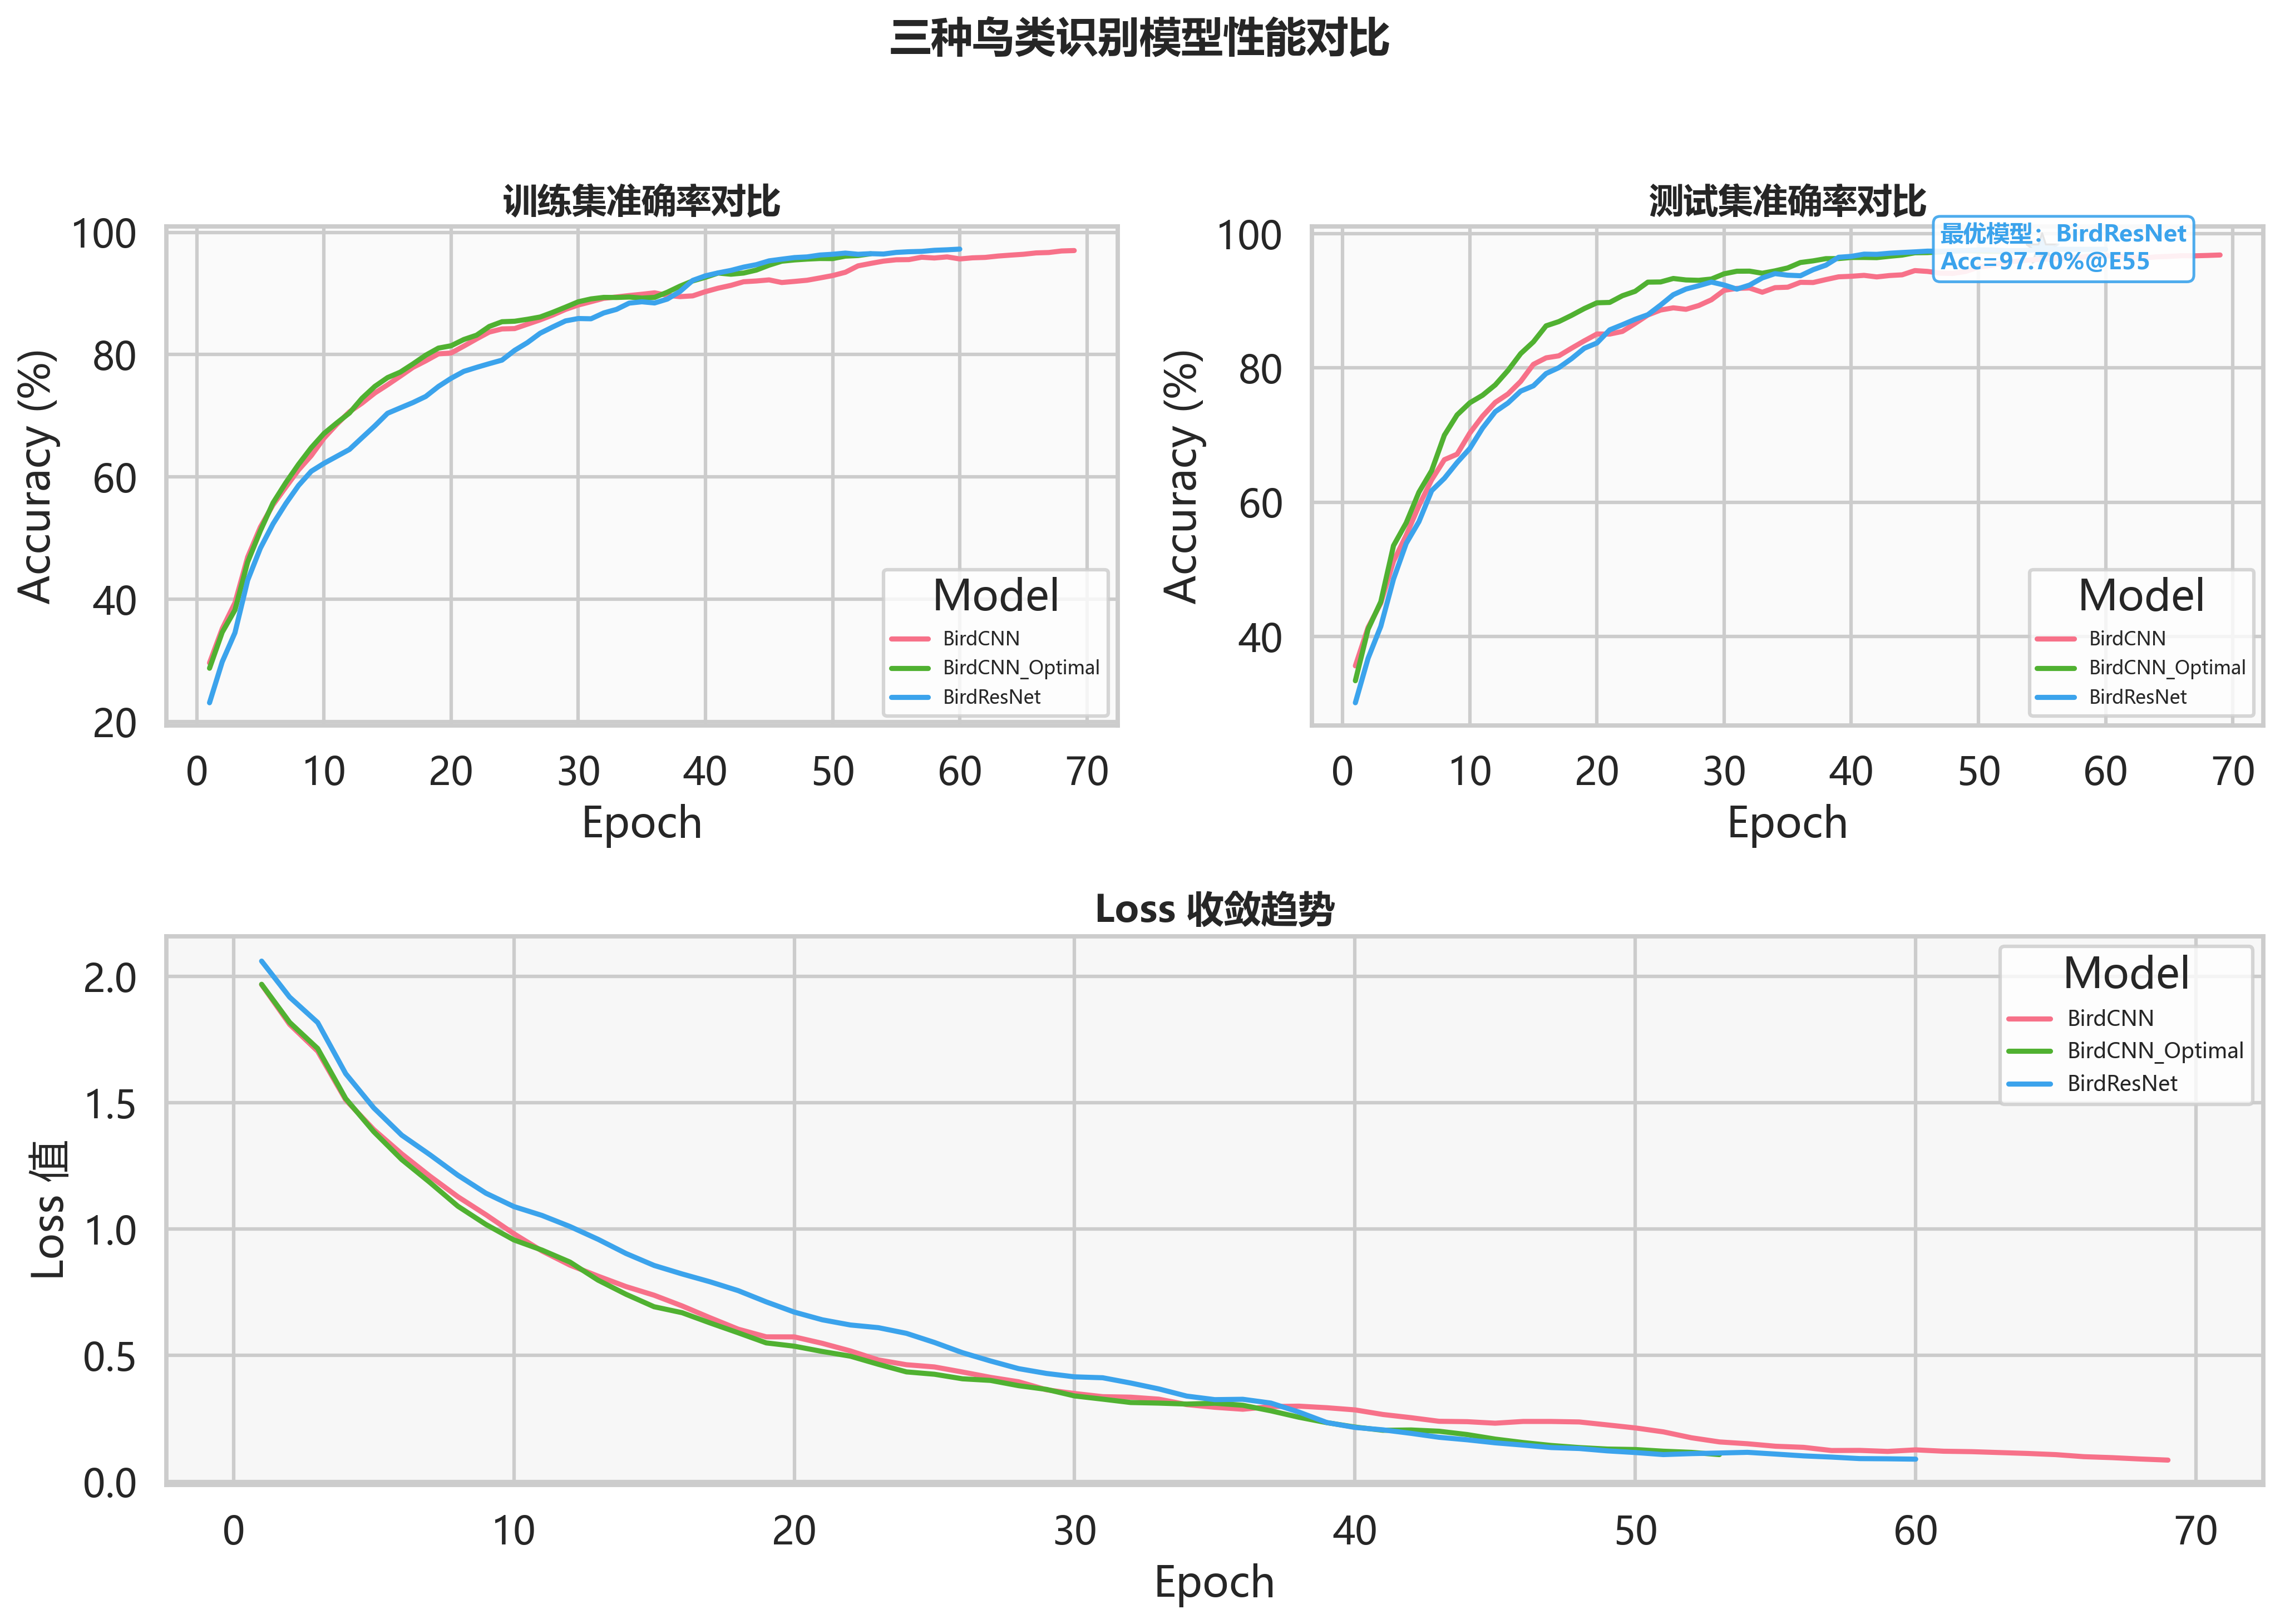

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patheffects import withStroke

def plot_model_comparison_best_only(results, point_interval=5, smooth_window=3):
    sns.set_theme(style="whitegrid", context="talk")
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'Arial']
    plt.rcParams['axes.unicode_minus'] = False

    # ===== 数据整理 =====
    all_data = []
    for name, data in results.items():
        for epoch, (train_acc, test_acc, loss) in enumerate(
            zip(data["train_accs"], data["test_accs"], data["train_losses"]), 1
        ):
            all_data.append(["Train", name, epoch, train_acc, loss])
            all_data.append(["Test", name, epoch, test_acc, loss])
    df = pd.DataFrame(all_data, columns=["Phase", "Model", "Epoch", "Accuracy", "Loss"])

    # ===== 找出最优模型（测试集最高准确率） =====
    df_test = df[df["Phase"] == "Test"]
    best_idx = df_test["Accuracy"].idxmax()
    best_model = df_test.loc[best_idx, "Model"]
    best_acc = df_test.loc[best_idx, "Accuracy"]
    best_epoch = int(df_test.loc[best_idx, "Epoch"])

    print(f"🏆 最优模型: {best_model} | 测试集准确率 = {best_acc:.2f}% @ Epoch {best_epoch}")

    # ===== 绘图布局 =====
    fig = plt.figure(figsize=(14, 10), dpi=300)
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.1])
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    palette = sns.color_palette("husl", len(results))

    def smooth(y):
        return pd.Series(y).rolling(smooth_window, min_periods=1).mean()

    # ===== 训练集准确率 =====
    for (name, group), color in zip(df[df["Phase"] == "Train"].groupby("Model"), palette):
        group["Accuracy_smooth"] = smooth(group["Accuracy"])
        sns.lineplot(data=group, x="Epoch", y="Accuracy_smooth",
                     label=name, linewidth=2.2, color=color, ax=ax1)
    ax1.set_title("训练集准确率对比", fontsize=15, weight="bold")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Accuracy (%)")
    ax1.legend(title="Model", loc="lower right", fontsize=8)
    ax1.set_facecolor("#fafafa")

    # ===== 测试集准确率（高亮最优模型） =====
    for (name, group), color in zip(df[df["Phase"] == "Test"].groupby("Model"), palette):
        group["Accuracy_smooth"] = smooth(group["Accuracy"])
        sns.lineplot(data=group, x="Epoch", y="Accuracy_smooth",
                     label=name, linewidth=2.2, color=color, ax=ax2)
        if name == best_model:
            ax2.scatter(best_epoch, best_acc, s=200, color=color, marker="*", edgecolor="black", linewidth=0.8, zorder=1)
            ax2.annotate(
                f"最优模型：{best_model}\nAcc={best_acc:.2f}%@E{best_epoch}",
                xy=(best_epoch, best_acc),
                xytext=(best_epoch - 8, best_acc - 3),
                fontsize=10, color=color, weight="bold",
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.2, alpha=0.9),
                arrowprops=dict(arrowstyle="->", lw=1, color=color, alpha=0.7)
            )

    ax2.set_title("测试集准确率对比", fontsize=15, weight="bold")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy (%)")
    ax2.legend(title="Model", loc="lower right", fontsize=8)
    ax2.set_facecolor("#fafafa")

    # ===== Loss 收敛趋势 =====
    for (name, group), color in zip(df[df["Phase"] == "Train"].groupby("Model"), palette):
        group["Loss_smooth"] = smooth(group["Loss"])
        sns.lineplot(data=group, x="Epoch", y="Loss_smooth",
                     label=name, linewidth=2.2, color=color, ax=ax3)
    ax3.set_title("Loss 收敛趋势", fontsize=16, weight="bold")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Loss 值")
    ax3.legend(title="Model", loc="upper right", fontsize=9)
    ax3.set_facecolor("#f7f7f7")

    # ===== 总标题 =====
    fig.suptitle("三种鸟类识别模型性能对比",
                 fontsize=18, weight="bold", y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
plot_model_comparison_best_only(results)